# Simple Harmonic Oscillator
* Author: 107010002 林祥源

In [13]:
import numpy as np
import scipy as sp
from scipy import constants as cnst
import matplotlib.pyplot as plt
from ipywidgets import interactive

## Equation of Motion in One Dimension
By Hooke's law:
$$ F=-kx $$
Combining this with Newton's Second Law of Motion:
$$ F=ma=m\ddot{x}=-kx  $$
The solution to this second order linear ordinary differential equation takes the form of sinusiodal functions
$$ x(t) = A \cos\Big(\sqrt{\frac{k}{m}}t+\phi\Big) \quad \text{or} \quad x(t) = B \sin\Big(\sqrt{\frac{k}{m}}t+\delta\Big) $$
The phase term $ \phi,\: \delta $ and the amplitude coefficient $A$ can be determined from the initial condition at $t=0$  .
For simplicity reasons, I denote the parameter $\sqrt{k/m}$ as $\omega$. Dimensional analysis shows that $\omega$ shares the same unit as frequency. Sinusoidal functions possess periodic properties with $2\pi/\omega$ as the period in this case, $\omega$ is therefore the angular frequency.


Let the equation of motion be:
$$ x(t) = A\sin{(\omega t + \phi)} $$
The time derivative of the equation of motion yields the velocity function:
$$ v = \frac{d}{dt}x(t) = A \omega \cos{(\omega t + \phi)} $$ 


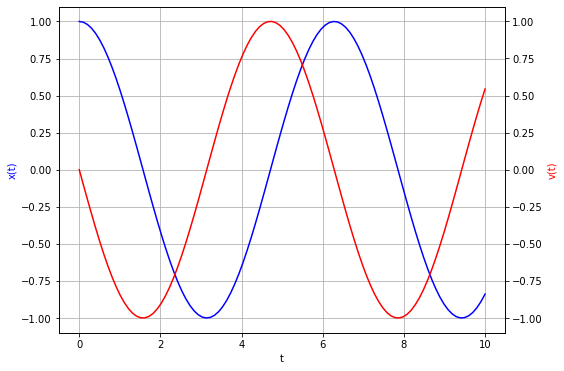

In [14]:
k = 1
m = 1
omega = np.sqrt(k/m)
A = 1
phase = 0.5*np.pi
t = np.linspace(0,10,100)
x = A * np.sin(omega*t + phase)
v = A * omega * np.cos(omega*t + phase)
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.plot(t, x, 'b-')
ax2.plot(t, v, 'r-')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)', color = 'b')
ax2.set_ylabel('v(t)', color = 'r')
ax1.grid()

## Conservation of Energy
The work done by displacing the particle by an amount $dx$:
$$ dW = -Fdx = kxdx $$
The restoring force stored as a function of displacement can be obtained by integrating this equation with respect to $x$:
$$ U(x) = \frac{1}{2}kx^2 $$
To express as a function of time:
$$ U(t) = \frac{1}{2}k [A\sin(\omega t + \phi)]^2 $$
The kinetic energy can be calculated from the previously derived function of velocity:
$$ T(t) = \frac{1}{2}mv^2 = \frac{1}{2}m[A\omega\cos(\omega t + \phi)]^2 = \frac{1}{2}k[A\cos(\omega t + \phi)]^2$$
By the Pythagorean identity, it is shown that the total energy is determined by the imposed initial condition of this system, and is a conserved value.
$$ E(t) = U(t) + T(t) = \frac{1}{2}kA^2[\cos^2(\omega t + \phi) + \sin^2(\omega t + \phi)]^2 = \frac{1}{2}kA^2 $$

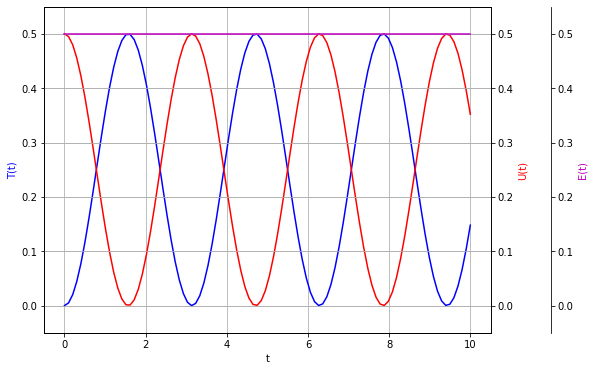

In [15]:
U = 0.5 * k * (x**2)
T = 0.5 * m * (v**2)
E = U + T
fig, host = plt.subplots(figsize = (8,6))
par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("t")
host.set_ylabel("T(t)", color = 'b')
par1.set_ylabel("U(t)", color = 'r')
par2.set_ylabel("E(t)", color = 'm')
host.set_ylim([-0.05,0.55])
par1.set_ylim([-0.05,0.55])
par2.set_ylim([-0.05,0.55])
host.plot(t, T, 'b-')
par1.plot(t, U, 'r-')
par2.plot(t, E, 'm-')
par2.spines['right'].set_position(('outward', 60))
host.grid()
par2.grid()

## Harmonic Oscillation in Two Dimensions
Recast the simple harmonic motion previously discussed in a two dimensional coordinate system
$$
\begin{align*}
x&=r\cos\theta &F_x &= -k_xx = -k_xr\cos(\theta)\\
y&=r\sin\theta &F_y &= -k_yy = -k_yr\sin(\theta) 
\end{align*}
$$
The equations of motion along with the solutions are
$$
\begin{align*}
&\ddot{x} + {\omega_x}^2 = 0 & x(t) = A\cos(\omega_xt - \phi)\\
&\ddot{y} + {\omega_y}^2 = 0 & y(t) = B\cos(\omega_yt - \theta)
\end{align*}
$$

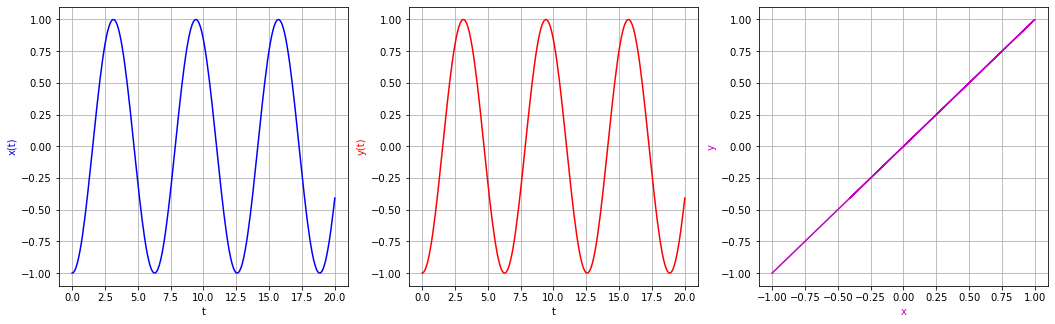

In [16]:
kx = 1
ky = 1
m = 1
omegax = np.sqrt(kx/m)
omegay = np.sqrt(ky/m)
A = 1
B = 1
xphase = 1 * np.pi
yphase = 1 * np.pi

t = np.linspace(0,20,200)
x = A * np.cos(omegax * t + xphase)
y = B * np.cos(omegay * t + yphase)
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (5 * 3, 5 * 1))
plt.tight_layout(pad = 3.0)

ax = ax.flatten()
ax[0].plot(t, x, 'b-')
ax[0].set_ylabel("x(t)", color = "b")
ax[0].set_xlabel("t")
ax[0].grid()

ax[1].plot(t, y, 'r-')
ax[1].set_ylabel("y(t)", color = "r")
ax[1].set_xlabel("t")
ax[1].grid()

ax[2].plot(x, y, 'm-')
ax[2].set_xlabel("x", color = "m")
ax[2].set_ylabel("y", color = "m")
ax[2].grid()



The demonstration above shows the case when this system has identical angular frequency, amplitude, and 0 phase difference between the x and y direction

## Effects of non identical phase shifts
We observe the periodic nature of the solution to the equation of motion, and focus on the phase shift parameters $\phi$ and $\theta$. Both functions are well defined in the domain $t:(-\infty, \infty)$. With the same angular frequency $(\omega_x = \omega_y = \omega)$, any degree of shift can be reduced to an equivalent amount within $[-\pi, \pi]$, and the phase difference is therefore constricted between $[0,2\pi]$.
Denote the phase difference between the two functions as $\delta \equiv \phi - \theta$
$$
\begin{align*}
x&=A\cos(\omega t + \phi)=A\cos(\omega t + \delta + \theta)\\
&=A\Big[\cos(\omega t + \theta)\cos(\delta) - \sin(\omega t + \theta)\sin(\delta)\Big]\\
&=A\Big[\frac{y}{B}\cos(\delta) - \sqrt{1-\frac{\cos^2(\omega t + \theta)}{B^2}}\sin(\delta)\Big]
\end{align*}
$$
Isolating the square root term and squaring both sides yields:
$$
\begin{gather*}
B^2x^2+A^2y^2-2ABxy\cos(\delta)=A^2B^2\sin^2(\delta)
\end{gather*}
$$
The equation above is expresses the path of the particle on the $x-y$ plane.

In [17]:
t = np.linspace(0, 100, 2000)
xi = 0
yi = 0
A = 1
B = 1
omegax = 1
omegay = 1

def path(xshift,yshift):
    x = A * np.cos(omegax*t + xshift*np.pi/180)
    y = B * np.cos(omegay*t + yshift*np.pi/180)
    plt.figure(figsize=[8,8])
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()


interactive_plot = interactive(path, xshift=(-180,180,360), yshift=(-180,180,360))
interactive_plot

interactive(children=(IntSlider(value=-180, description='xshift', max=180, min=-180, step=360), IntSlider(valu…

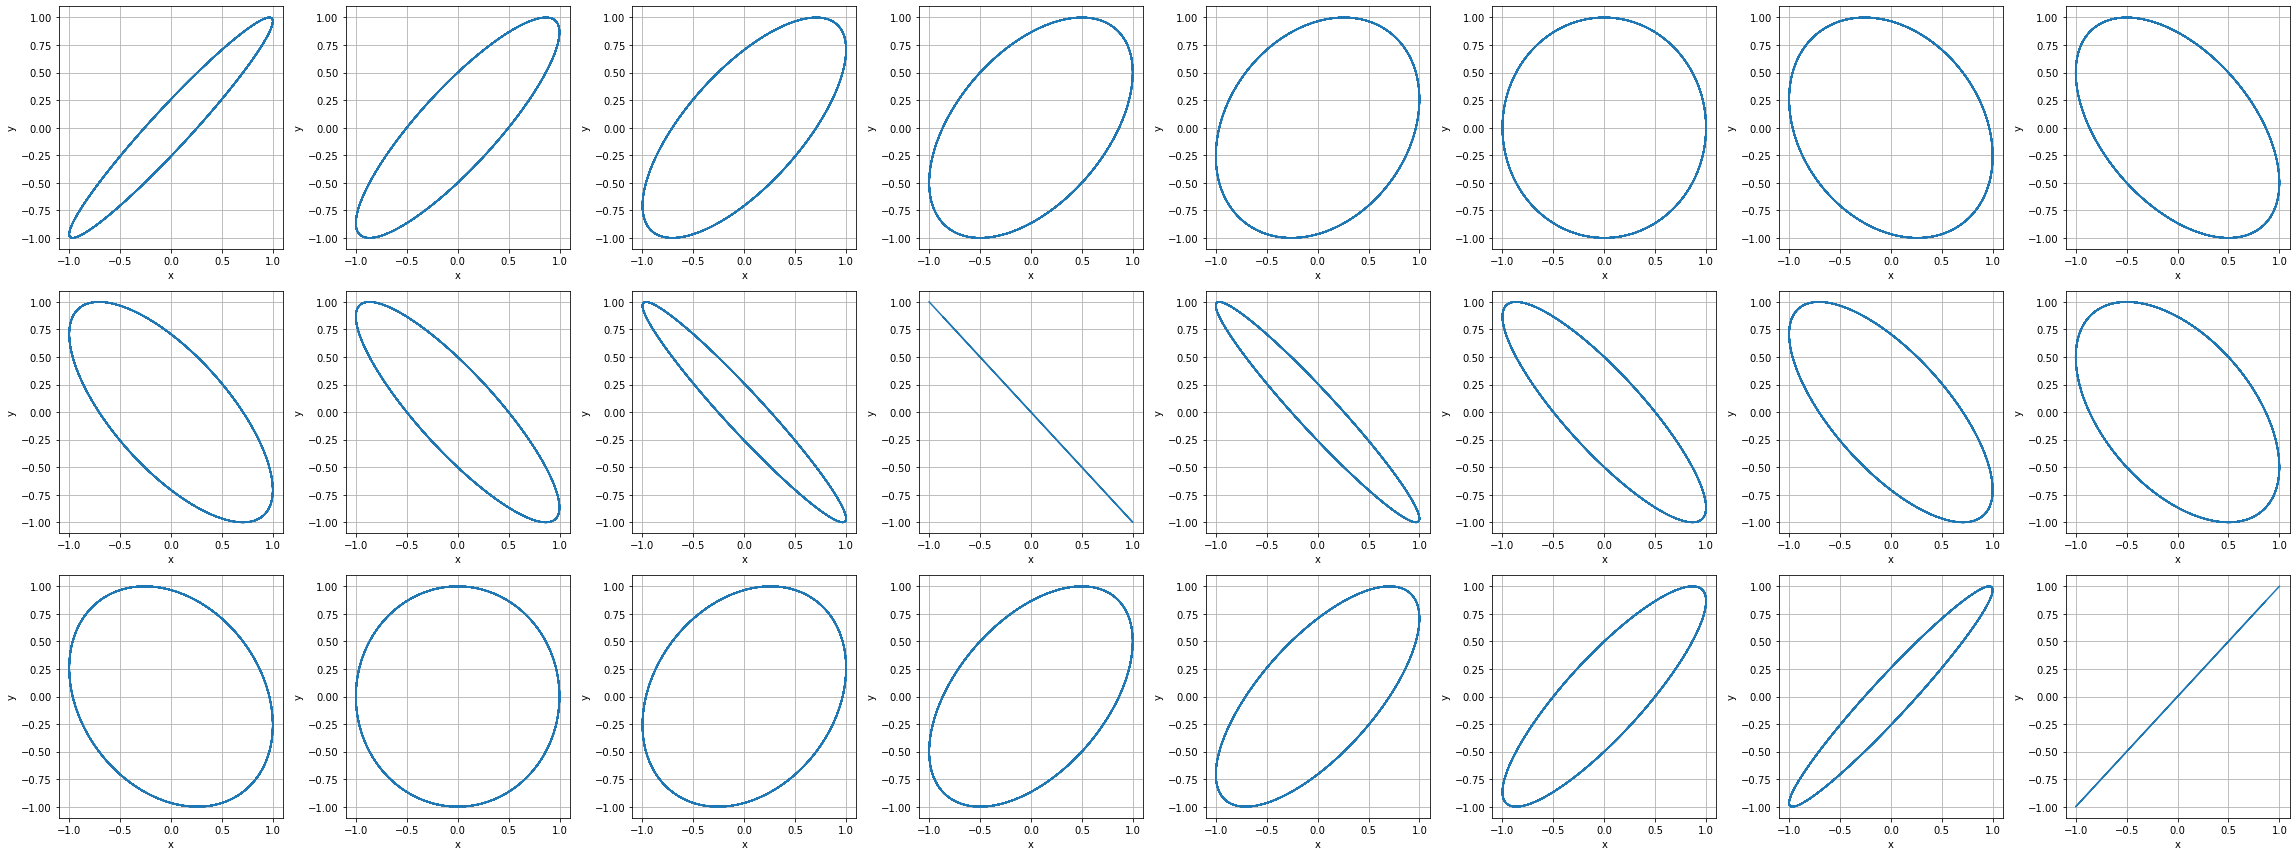

In [18]:
fig, ax = plt.subplots(ncols = 8, nrows = 3, figsize = (4 * 8, 4 * 3))
ax = ax.flatten()
t=np.linspace(0,100,1000)
for i in range(24):
    x = A*np.cos(omegax*t + np.pi*(i+1)/12)
    y = B*np.cos(omegay*t)
    ax[i].plot(x,y)
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].grid()
    plt.tight_layout()

## Effects of non identical angular frequency
The figure below investigates the effects brought by altering the ratio between angular frequencies in an iterative way.

In [19]:
t = np.linspace(0, 20, 10000)
xi = 0
yi = 0
A = 1
B = 1


def path(omegax,omegay,xshift,yshift):
    x = A * np.cos(omegax*t + xshift*np.pi/180)
    y = B * np.cos(omegay*t + yshift*np.pi/180)
    plt.figure(figsize=[8,8])
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()


interactive_plot = interactive(path, omegax=(1,100,100),omegay=(1,100,100), xshift=(-180,180,360), yshift=(-180,180,360))
interactive_plot

interactive(children=(IntSlider(value=1, description='omegax', min=1, step=100), IntSlider(value=1, descriptio…

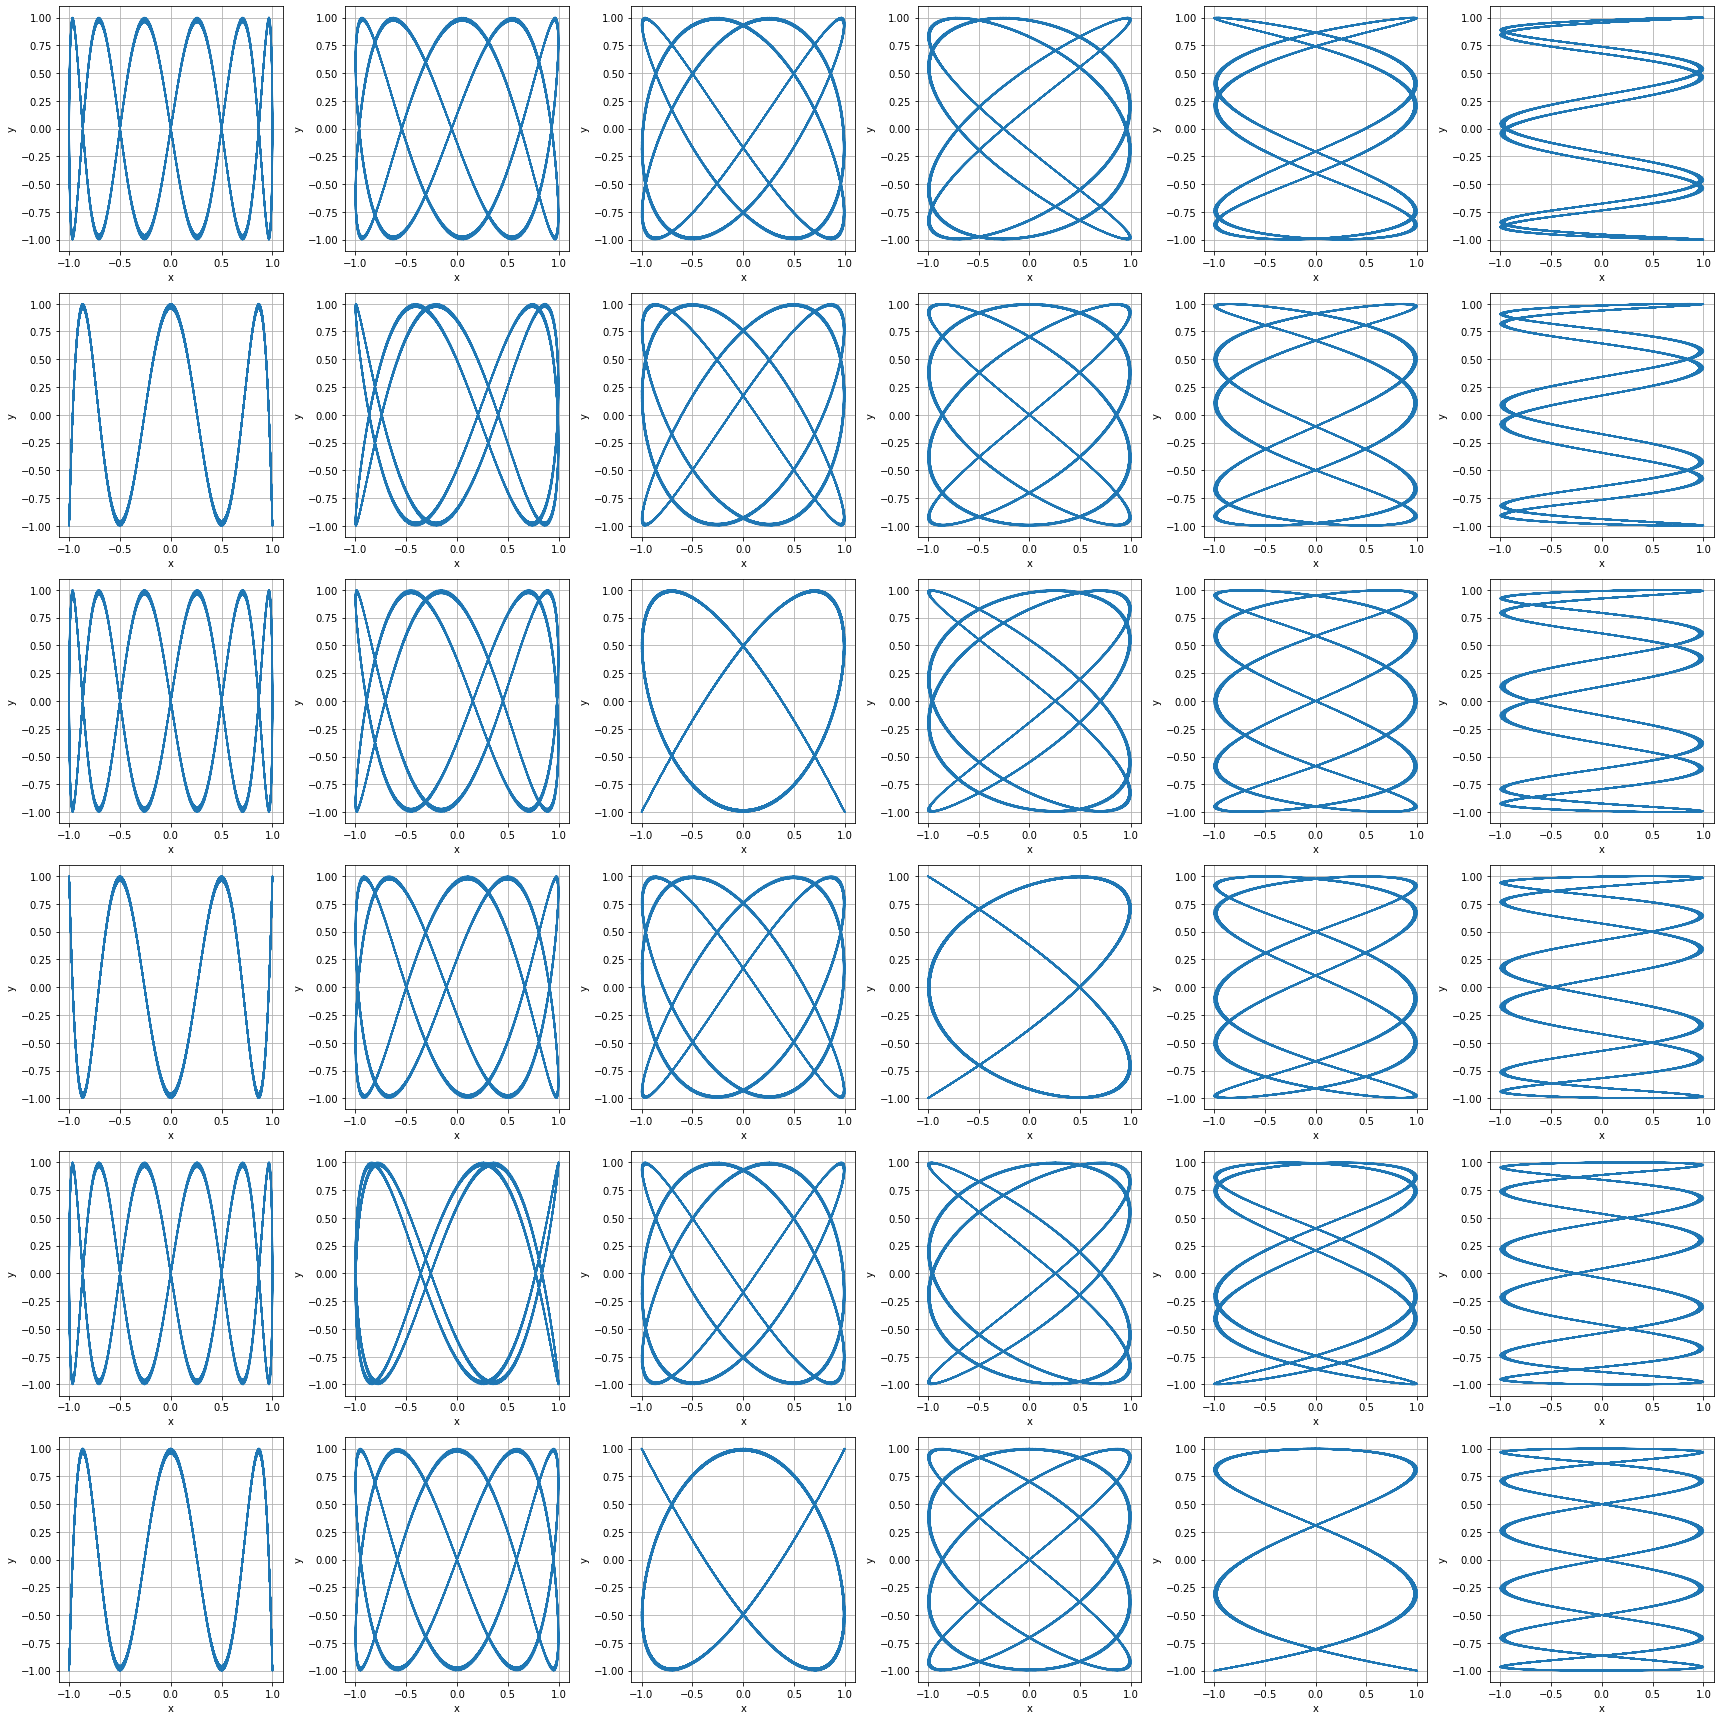

In [43]:
fig, ax = plt.subplots(ncols = 6, nrows = 6, figsize = (4 * 6, 4 * 6))
t=np.linspace(0,100,1000)
for i in range(6):
    for j in range (6):
        x = A * np.cos((j+1)*t + (i+1)*np.pi/12)
        y = B * np.cos((6-j)*t)
        ax[i,j].plot(x,y)
        ax[i,j].set_xlabel("x")
        ax[i,j].set_ylabel("y")
        ax[i,j].grid()
        plt.tight_layout()

## The Phase Diagram
Revisiting the case of a simple harmonic oscillator in one dimension. The equation of motion is a second order ordinary differential equation, indicating that this system is determined by intial conditions of position $x(t_0)$ and velocity $\dot{x}(t_0)$
$$
\begin{align*}
x(t) &= A\cos(\omega t + \phi)\\
\dot{x}(t) &= A \omega \sin(\omega t + \phi)
\end{align*}
$$
Using the Pythagorean Identity, we may couple this pair of equations into the form of an ellipse.
$$
\frac{x^2}{A^2} + \frac{\dot{x}^2}{A^2 \omega^2} = 1
$$
Since the total energy is conserved ($E=\frac{1}{2}kA^2$), we may express this formula in terms of given parameters: mass $m$, spring constant $k$, and total energy $E$ from the imposed initial conditions.
$$
\frac{x^2}{2E/k} + \frac{\dot{x}^2}{2E/m} = 1
$$
Plotting points on the ($x$, $\dot{x}$) plane (the phase space) shows a closed elliptical path (a result of energy conservation), altering the initial condition will change the shape of the ellipse.

In [21]:
t = np.linspace(0, 100, 1000)

def path(initial_x, initial_v, k, m):
    U = 0.5 * k * (initial_x**2)
    T = 0.5 * m * (initial_v**2)
    E = U + T
    A = np.sqrt(2*E/k)
    omega = np.sqrt(k/m)
    x = A * np.cos(omega*t)
    v = A * omega * np.sin(omega*t)
    plt.figure(figsize=(0.5*A, 0.5*A*omega))
    plt.plot(x, v)
    plt.xlabel('x')
    plt.ylabel('v')
    plt.grid()


interactive_plot = interactive(path, initial_x=(-10,10,20), initial_v=(-10,10,20), k=(1,10,10), m=(1,10,10))
interactive_plot

interactive(children=(IntSlider(value=-10, description='initial_x', max=10, min=-10, step=20), IntSlider(value…

## Damped Oscillation
To expand on the case of the one dimensional harmonic oscillator, we introduce a retarding force dependent on the velocity.
$$
F = m\ddot{x} + b\dot{x} = -kx
$$
Denote the damping parameter $\beta \equiv b/2m$
$$
\ddot{x}+2\beta\dot{x}+\omega x = 0
$$
Using the method of undetermined coefficients
$$
\begin{gather*}
x=e^{nt}\\
n^2 + 2\beta n + \omega = 0\\
n=-\beta \pm \sqrt{\beta^2 - \omega^2}\\
x(t)=e^{-\beta t}\Big[A\exp\big(t\sqrt{\beta^2 - \omega^2}\big) + B\exp\big(-t\sqrt{\beta^2 - \omega^2}\big)\Big]
\end{gather*}
$$
The behavior of this equation of motion can be characterized into three cases, namely when the square root term is a real value, zero, or imaginary.

### Critical Damping: $\beta^2 - \omega^2 = 0$
The exponent reduces to zero, the coefficients $A$, $B$ can be combined into a single value determined by the initial condition $x(t_0)$. As $t\rightarrow\infty$ this function will approach $x=0$ asymptotically (exponential decay).
$$
x(t)=e^{-\beta t}[A+Bt]
$$

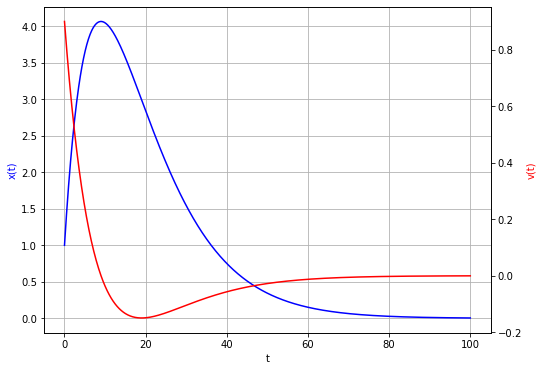

In [22]:
t= np.linspace(0,100,1000)
A = 1
B = 1
m = 100
k = 1
omega = np.sqrt(k/m)
beta = omega
x = (A + B*t)*np.exp(-1*beta*t)
v = -1*beta*np.exp(-1*beta*t)*(A + B*t) + B*np.exp(-1*beta*t)
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.plot(t, x, 'b-')
ax2.plot(t, v, 'r-')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)', color = 'b')
ax2.set_ylabel('v(t)', color = 'r')
ax1.grid()

### Underdamping: $\beta^2 - \omega^2 < 0$
The exponent holds an imaginary value, we may define ${\omega_D}^2 \equiv \omega^2 - \beta^2 $
$$
\begin{align*}
x(t)&=e^{-\beta t}[A\exp(i\omega_D t) + B\exp(-i\omega_D t)]\\
x(0) &= A+B\\
\dot{x}(t)&= -\beta e^{-\beta t}[A\exp(i\omega_D t) + B\exp\exp(-i\omega_D t)] + e^{-\beta t}[Ai\omega_D\exp(i\omega_D t) -i\omega_DB\exp\exp(-i\omega_D t)]\\
\dot{x}(0) &= -\beta(A+B)+(i\omega_D)(A-B)
\end{align*}
$$
In this discussion, $\beta$ and $\omega_D$ are real and non zero values. $\Im{A}+\Im{B} = 0$ and $\Re{A} - \Re{B} = 0$ must be satisified simultaneously in order for the initial position and velocity to be real values. It follows that $A=B^{*}$
Let $C'$ and $\delta$ be the modulus and argument of $A$, we may rewrite the equation of motion in the following form
$$
\begin{align*}
x(t)&= e^{-\beta t}[C'\exp(i\delta)\exp(i\omega_D t) + C'\exp(-i\delta)\exp(-i\omega_D t)]\\
&=Ce^{-\beta t}\cos(\omega_D t + \delta)
\end{align*}
$$
This function can be viewed as a cosine function with an exponentially decaying amplitude.

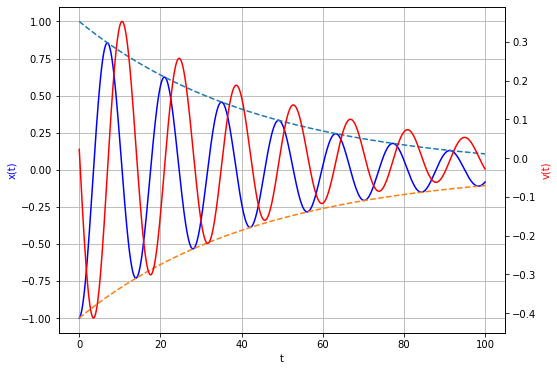

In [23]:
t= np.linspace(0,100,1000)
m = 5
k = 1
C = 1
delta = np.pi
omega = np.sqrt(k/m)
beta = 0.05 * omega
D = omega**2 - beta**2
x = C * np.exp(-1*beta*t)*np.cos(t*np.sqrt(D)+delta)
v = C * -1*beta*np.exp(-1*beta*t)*np.cos(t*np.sqrt(D)+delta) + (C * np.exp(-1*beta*t)*np.sin(t*np.sqrt(D)+delta) * np.sqrt(D))
T = C * np.exp(-1*beta*t)
B = -C * np.exp(-1*beta*t)
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.plot(t, x, 'b-')
ax2.plot(t, v, 'r-')
ax1.plot(t, T, '--')
ax1.plot(t, B, '--')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)', color = 'b')
ax2.set_ylabel('v(t)', color = 'r')
ax1.grid()

### Overdamping: $\beta^2 - \omega^2 < 0$
The exponent holds a real value, we may define ${\omega_1}^2 \equiv \beta^2 - \omega^2$
Equation of motion becomes:
$$
x(t) = e^{-\beta t}[A\exp(\omega_1 t) + B\exp(-\omega_1 t)]
$$

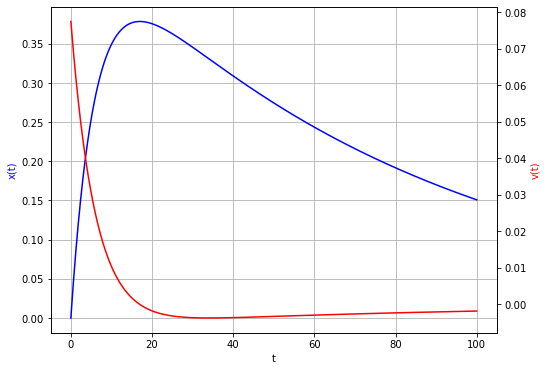

In [24]:
t = np.linspace(0,100,1000)
m = 500
k = 1
A = 0.5
B = -0.5
omega = np.sqrt(k/m)
beta = 2 * omega
D = beta**2 - omega**2
x = np.exp(-1*beta*t)*(A*np.exp(np.sqrt(D)*t) + B*np.exp(-1*np.sqrt(D)*t))
v = -1*beta*np.exp(-1*beta*t)*(A*np.exp(np.sqrt(D)*t) + B*np.exp(-1*np.sqrt(D)*t))+np.exp(-1*beta*t)*(A*np.exp(np.sqrt(D)*t) - B*np.exp(-1*np.sqrt(D)*t))*np.sqrt(D)
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.plot(t, x, 'b-')
ax2.plot(t, v, 'r-')
ax1.set_xlabel('t')
ax1.set_ylabel('x(t)', color = 'b')
ax2.set_ylabel('v(t)', color = 'r')
ax1.grid()

### Phase Diagrams
The retarding force will continuously decrease the total energy of the particle.

### Critically Damped

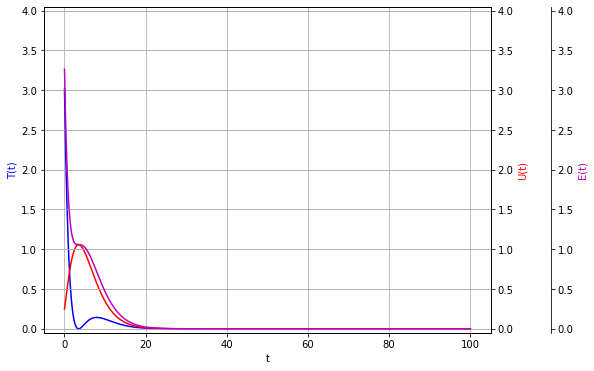

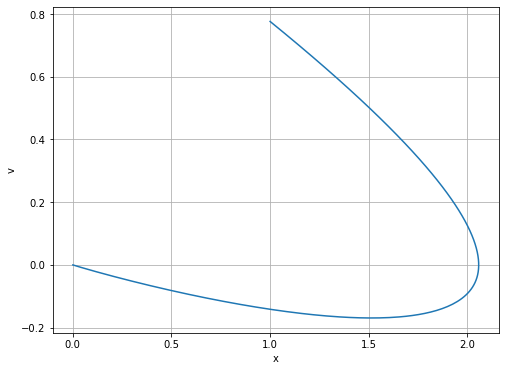

In [28]:
t= np.linspace(0,100,1000)
A = 1
B = 1
m = 10
k = 0.5
omega = np.sqrt(k/m)
beta = omega
x = (A+B*t)*np.exp(-1*beta*t)
v = -1*beta*np.exp(-1*beta*t)*(A+B*t)+B*np.exp(-1*beta*t)
U = 0.5 * k * (x**2)
T = 0.5 * m * (v**2)
E = U + T
fig, host = plt.subplots(figsize = (8,6))
par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("t")
host.set_ylabel("T(t)", color = 'b')
par1.set_ylabel("U(t)", color = 'r')
par2.set_ylabel("E(t)", color = 'm')
host.set_ylim([-0.05,4.05])
par1.set_ylim([-0.05,4.05])
par2.set_ylim([-0.05,4.05])
host.plot(t, T, 'b-')
par1.plot(t, U, 'r-')
par2.plot(t, E, 'm-')
par2.spines['right'].set_position(('outward', 60))
host.grid()
par2.grid()

plt.figure(figsize = (8,6))
plt.plot(x, v)
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

### Underdamped

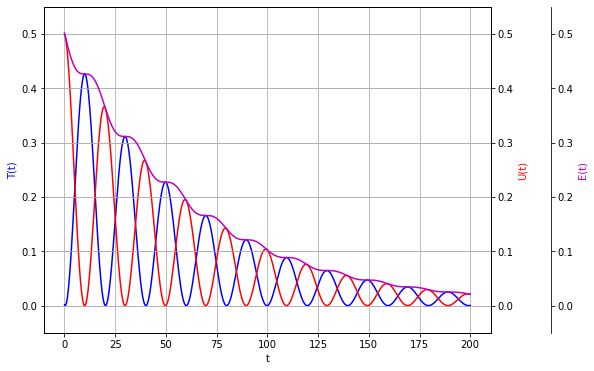

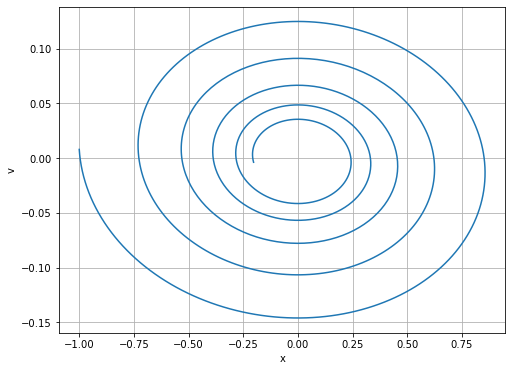

In [33]:
t= np.linspace(0,200,1000)
m = 40
k = 1
C = 1
delta = np.pi
omega = np.sqrt(k/m)
beta = 0.05 * omega
D = omega**2 - beta**2
x = C * np.exp(-1*beta*t)*np.cos(t*np.sqrt(D)+delta)
v = C * -1*beta*np.exp(-1*beta*t)*np.cos(t*np.sqrt(D)+delta) + (C * np.exp(-1*beta*t)*np.sin(t*np.sqrt(D)+delta) * np.sqrt(D))
U = 0.5 * k * (x**2)
T = 0.5 * m * (v**2)
E = U + T
fig, host = plt.subplots(figsize = (8,6))
par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("t")
host.set_ylabel("T(t)", color = 'b')
par1.set_ylabel("U(t)", color = 'r')
par2.set_ylabel("E(t)", color = 'm')
host.set_ylim([-0.05,0.55])
par1.set_ylim([-0.05,0.55])
par2.set_ylim([-0.05,0.55])
host.plot(t, T, 'b-')
par1.plot(t, U, 'r-')
par2.plot(t, E, 'm-')
par2.spines['right'].set_position(('outward', 60))
host.grid()
par2.grid()

plt.figure(figsize = (8,6))
plt.plot(x, v)
plt.xlabel('x')
plt.ylabel('v')
plt.grid()

### Overdamped

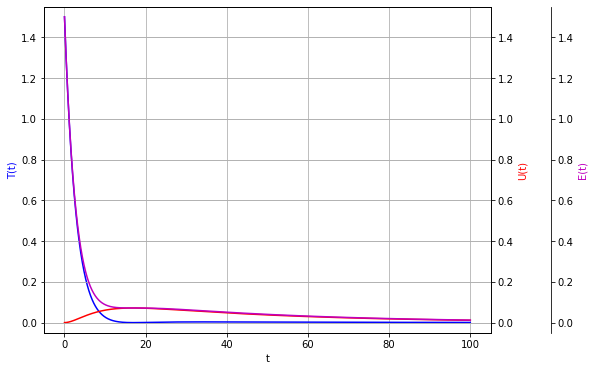

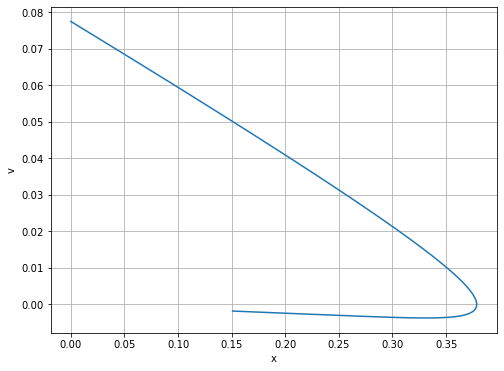

In [27]:
t = np.linspace(0,100,1000)
m = 500
k = 1
A = 0.5
B = -0.5
omega = np.sqrt(k/m)
beta = 2 * omega
D = beta**2 - omega**2
x = np.exp(-1*beta*t)*(A*np.exp(np.sqrt(D)*t) + B*np.exp(-1*np.sqrt(D)*t))
v = -1*beta*np.exp(-1*beta*t)*(A*np.exp(np.sqrt(D)*t) + B*np.exp(-1*np.sqrt(D)*t))+np.exp(-1*beta*t)*(A*np.exp(np.sqrt(D)*t) - B*np.exp(-1*np.sqrt(D)*t))*np.sqrt(D)
U = 0.5 * k * (x**2)
T = 0.5 * m * (v**2)
E = U + T

fig, host = plt.subplots(figsize = (8,6))
par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("t")
host.set_ylabel("T(t)", color = 'b')
par1.set_ylabel("U(t)", color = 'r')
par2.set_ylabel("E(t)", color = 'm')
host.set_ylim([-0.05,1.55])
par1.set_ylim([-0.05,1.55])
par2.set_ylim([-0.05,1.55])
host.plot(t, T, 'b-')
par1.plot(t, U, 'r-')
par2.plot(t, E, 'm-')
par2.spines['right'].set_position(('outward', 60))
host.grid()
par2.grid()

plt.subplots(figsize = (8,6))
plt.plot(x, v)
plt.xlabel('x')
plt.ylabel('v')
plt.grid()